Qestion 1: Data Exploration

In [1]:
import pandas as pd

In [88]:
#1.1
df = pd.read_csv("stroke_data.csv")
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
1,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
3,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
4,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1


In [90]:
#1.2
#print(stroke.info())
rows, cols = df.shape
print(f"Rows: {rows:,}  |  Columns: {cols}")

Rows: 5,117  |  Columns: 12


In [92]:
#1.3
print('age min : ', df['age'].min())
print('age max : ', df['age'].max())
print('age mean : ', df['age'].mean())
print('age std : ', df['age'].std())

age min :  0.08
age max :  82.0
age mean :  43.231971858510846
age std :  22.60762718984012


In [94]:
#1.4
print('age mode : ', df['age'].mode())

if len(df['age'].mode()) == 1:
    print("Modality: Unimodal (only one mode)")
elif len(df['age'].mode()) == 2:
    print("Modality: Bimodal (two modes)")
else:
    print(f"Modality: Multimodal ({len(df['age'].mode())} modes)")

age mode :  0    78.0
Name: age, dtype: float64
Modality: Unimodal (only one mode)


In [96]:
#1.5
q1 = df['avg_glucose_level'].quantile(.25)
q3 = df['avg_glucose_level'].quantile(.75)
print("Q1 : ", q1)
print("Q3 : ", q3)

Q1 :  77.23
Q3 :  114.05


In [78]:
#1.6
iqr = q3 - q1
print('IQR : ', iqr)

IQR :  36.81999999999999


In [217]:
#1.7
bmi_clean = df['bmi'].dropna()
#bmi_clean.describe()
print('bmi_clean min : ', bmi_clean.min())
print('bmi_clean q1 : ', bmi_clean.quantile(.25))
print('bmi_clean max : ', bmi_clean.max())
print('bmi_clean q3 : ', bmi_clean.quantile(.75))
print('bmi_clean mean : ', bmi_clean.mean())

bmi_clean min :  10.3
bmi_clean q1 :  23.5
bmi_clean max :  97.6
bmi_clean q3 :  33.1
bmi_clean mean :  28.887670396744664


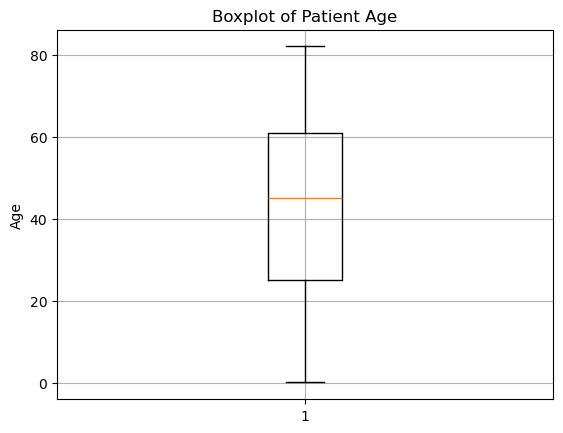

In [110]:
#2.1
import matplotlib.pyplot as plt

plt.boxplot(df['age'].dropna())
plt.ylabel("Age")
plt.title("Boxplot of Patient Age")
plt.grid(True)
plt.show()

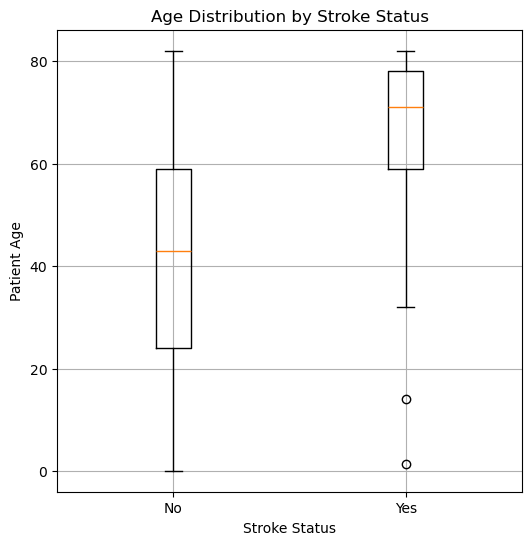

In [116]:
#2.2
age_yes = df[df['stroke'] == 1]['age'].dropna()
age_no = df[df['stroke'] == 0]['age'].dropna()

plt.figure(figsize=(6,6))
plt.boxplot([age_no, age_yes], labels=['No', 'Yes'])

plt.xlabel('Stroke Status')
plt.ylabel('Patient Age')
plt.title('Age Distribution by Stroke Status')
plt.grid(True)
plt.show()

2.3

Boxplots show that the median age of patients with stroke is much higher, and most are concentrated over the age of 60, while patients without stroke have a wider age range and include younger age groups.

This suggests that the older you are, the greater the risk of stroke.

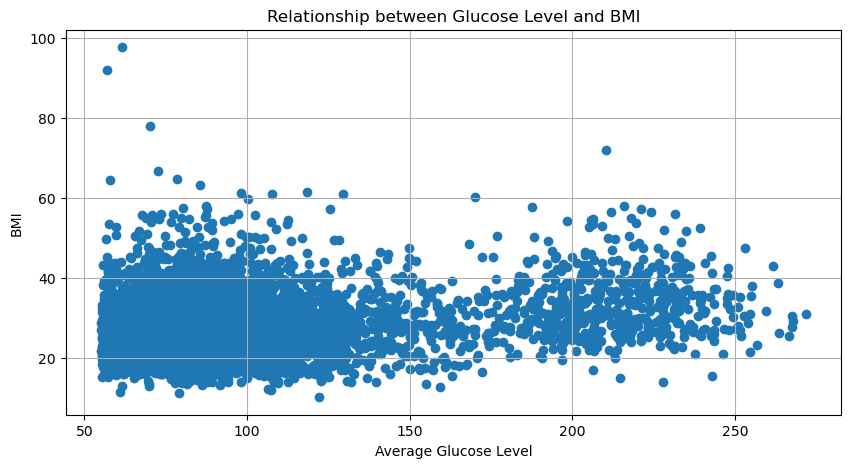

In [131]:
#2.4
plt.figure(figsize=(10,5))
plt.scatter(df['avg_glucose_level'], df['bmi'])
plt.xlabel('Average Glucose Level')
plt.ylabel('BMI')
plt.title('Relationship between Glucose Level and BMI')
plt.grid(True)
plt.show()

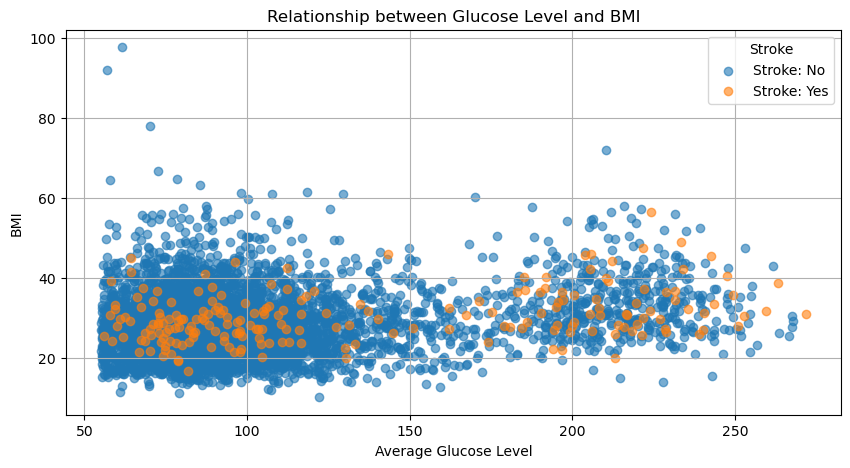

In [137]:
#2.5
stroke_yes = df[df['stroke'] == 1]
stroke_yes = stroke_yes[stroke_yes['avg_glucose_level'].notna() & stroke_yes['bmi'].notna()]

stroke_no = df[df['stroke'] == 0]
stroke_no = stroke_no[stroke_no['avg_glucose_level'].notna() & stroke_no['bmi'].notna()]

plt.figure(figsize=(10,5))
plt.scatter(stroke_no['avg_glucose_level'], stroke_no['bmi'], label='Stroke: No', alpha=0.6)
plt.scatter(stroke_yes['avg_glucose_level'], stroke_yes['bmi'], label='Stroke: Yes', alpha=0.6)

plt.xlabel('Average Glucose Level')
plt.ylabel('BMI')
plt.title('Relationship between Glucose Level and BMI')
plt.legend(title='Stroke')
plt.grid(True)
plt.show()

2.6

The higher the blood sugar level, the noticeable proportion of stroke patients (orange).
**BMI is in the medium to high range (25–40)** with more stroke patients.
However, in most sections, the presence or absence of strokes is overlapped → not a linear relationship.
Therefore, although there is a tendency that hyperglycemia + overweight/obese combination may be a risk factor, it is not a definitive pattern.

In [140]:
#3.1
hypertensive_patients = df[df['hypertension'] == 1]

stroke_count = hypertensive_patients['stroke'].sum()

print(f"Total hypertensive patients: {len(hypertensive_patients)}")
print(f"Stroke cases among them: {stroke_count}")

Total hypertensive patients: 499
Stroke cases among them: 66


In [142]:
#3.2
selected = df[(df['avg_glucose_level'] > 200) & (df['age'] > 60)]

stroke_count = selected[selected['stroke'] == 1].shape[0]

print(f"Total patients with glucose > 200 and age > 60: {len(selected)}")
print(f"Stroke cases among them: {stroke_count}")

Total patients with glucose > 200 and age > 60: 241
Stroke cases among them: 44


In [146]:
#3.3
smoker = df['smoking_status'].astype(str).str.lower().isin(['smokes'])

older_than_50 = df['age'] > 50

selected = df[smoker & older_than_50]

avg_bmi = selected['bmi'].dropna().mean()

print(f"Average BMI of smokers over 50: {avg_bmi:.2f}")

Average BMI of smokers over 50: 30.68


In [148]:
#3.4
work_type_counts = df['work_type'].value_counts(dropna=False)

print(work_type_counts)

work_type
Private          2929
Self-employed     821
children          687
Govt_job          658
Never_worked       22
Name: count, dtype: int64


Question 2: Data Cleaning

In [150]:
#3.5
def stroke_pct(x):
    return 100 * x.sum() / len(x) if len(x) > 0 else None

smoke_group = df.groupby('smoking_status', dropna=False).agg(
    total=('stroke', 'size'),
    stroke_pct = ('stroke', stroke_pct))

smoke_group['no_stroke_pct'] = 100 - smoke_group['stroke_pct']

print(smoke_group)

                 total  stroke_pct  no_stroke_pct
smoking_status                                   
Unknown           1547    3.038138      96.961862
formerly smoked    887    7.891770      92.108230
never smoked      1892    4.756871      95.243129
smokes             791    5.309735      94.690265


Question 2: Data Cleaning

In [163]:
#1.1
cols_ex_id = [c for c in df.columns if c != 'id']

dup_flags = df.duplicated(subset=cols_ex_id, keep=False)

print(dup_flags.head(5))

0     True
1    False
2    False
3    False
4    False
dtype: bool


In [169]:
#1.2
df_no_duplicates = df.drop_duplicates(subset=cols_ex_id, keep='first')

print('Before removing duplicates: ', df.shape)
print('After removing duplicates: ', df_no_duplicates.shape)

Before removing duplicates:  (5117, 12)
After removing duplicates:  (5110, 12)


In [171]:
#1.3
print("DataFrame shape after removing duplicates:", df_no_duplicates.shape)

DataFrame shape after removing duplicates: (5110, 12)


In [173]:
#2.1
missing_bmi = df_no_duplicates['bmi'].isna().sum()
print('Missing values in bmi column: ', missing_bmi)

Missing values in bmi column:  201


In [181]:
#2.2
df_clean = df_no_duplicates[df_no_duplicates['bmi'].notna()].copy()
print('New dataframe shape after removing missing BMI: ', df_clean.shape)

New dataframe shape after removing missing BMI:  (4909, 12)


In [183]:
#2.3
cols_keep = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'gender', 'smoking_status', 'work_type']

df_subset = df_clean[cols_keep].copy()

print('Subset dataframe shape: ', df_subset.shape)
df_subset.head()

Subset dataframe shape:  (4909, 8)


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,smoking_status,work_type
1,67.0,0,1,228.69,36.6,Male,formerly smoked,Private
3,80.0,0,1,105.92,32.5,Male,never smoked,Private
4,49.0,0,0,171.23,34.4,Female,smokes,Private
5,79.0,1,0,174.12,24.0,Female,never smoked,Self-employed
6,81.0,0,0,186.21,29.0,Male,formerly smoked,Private


In [185]:
#2.4
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(
    df_subset, test_size = 0.10, random_state = 42, shuffle = True)

print('Train shape: ', train_df.shape)
print('Test shape: ', test_df.shape)

Train shape:  (4418, 8)
Test shape:  (491, 8)


In [191]:
#2.5
import numpy as np
test_eval_copy = test_df.copy()

test_df_missing = test_df.copy()
test_df_missing['avg_glucose_level'] = np.nan

print('Evaluation copy shape: ', test_eval_copy.shape)
print('Test set with avg_glucose_level set to NaN shape: ', test_df_missing.shape)

Evaluation copy shape:  (491, 8)
Test set with avg_glucose_level set to NaN shape:  (491, 8)


In [197]:
#2.6
from sklearn.metrics import mean_squared_error

mean_val = train_df['avg_glucose_level'].mean()

mean_imputed = test_df_missing.copy()
mean_imputed['avg_glucose_level'] = mean_val

rmse_mean = np.sqrt(mean_squared_error(
    test_eval_copy['avg_glucose_level'], mean_imputed['avg_glucose_level']))

print('Mean of training set avg_glucose_level: ', mean_val)
print('RMSE mean inputation: ', rmse_mean)

Mean of training set avg_glucose_level:  105.33224988682662
RMSE mean inputation:  43.377039940187935


In [199]:
#2.7
median_val = train_df['avg_glucose_level'].median()

median_imputed = test_df_missing.copy()
median_imputed['avg_glucose_level'] = median_val

rmse_median = np.sqrt(mean_squared_error(
    test_eval_copy['avg_glucose_level'], median_imputed['avg_glucose_level']))

print('Median of training set avg_glucose_level: ', median_val)
print('RMSE median imputation: ', rmse_median)

Median of training set avg_glucose_level:  91.65
RMSE median imputation:  45.40217222299161


In [201]:
#2.8
from sklearn.impute import SimpleImputer

most_freq_imputer = SimpleImputer(strategy = 'most_frequent')

most_freq_imputer.fit(train_df[['avg_glucose_level']])

most_freq_imputed = test_df_missing.copy()
most_freq_imputed[['avg_glucose_level']] = most_freq_imputer.transform(
    most_freq_imputed[['avg_glucose_level']])

rmse_most_freq = np.sqrt(mean_squared_error(
    test_eval_copy['avg_glucose_level'], most_freq_imputed['avg_glucose_level']))

print('Most frequent value used: ', most_freq_imputer.statistics_[0])
print('RMSE most frequent imputation: ', rmse_most_freq)

Most frequent value used:  93.88
RMSE most frequent imputation:  44.794148380388215


In [203]:
#2.9
from sklearn.impute import KNNImputer

num_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

knn_imputer = KNNImputer(n_neighbors = 5)

knn_imputer.fit(train_df[num_cols])

test_num_missing = test_df_missing[num_cols].copy()
knn_imputed_array = knn_imputer.transform(test_num_missing)

knn_imputed_df = pd.DataFrame(knn_imputed_array, columns = num_cols, index = test_df_missing.index)

rmse_knn = np.sqrt(mean_squared_error(
    test_eval_copy['avg_glucose_level'], knn_imputed_df['avg_glucose_level']))

print('RMSE KNN Imputer, k=5: ', rmse_knn)

RMSE KNN Imputer, k=5:  46.69371869077378


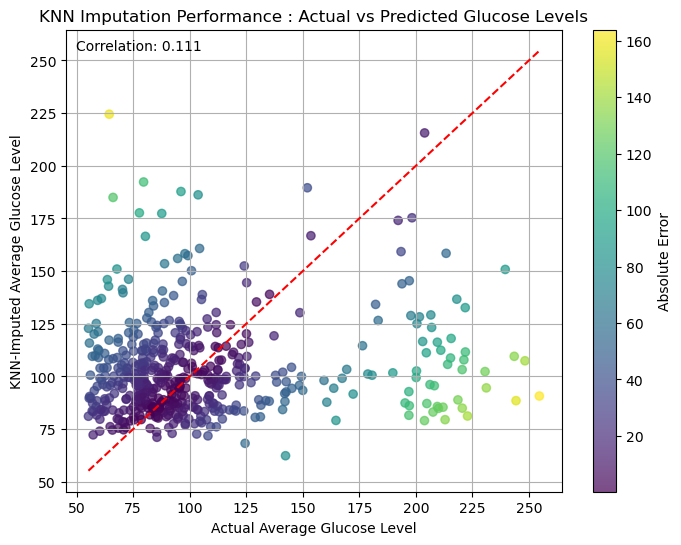

In [225]:
#2.10
x_true = test_eval_copy['avg_glucose_level'].values
y_pred = knn_imputed_df['avg_glucose_level'].values

abs_err = np.abs(x_true - y_pred)

plt.figure(figsize = (8,6))
sc = plt.scatter(x_true, y_pred, c = abs_err, cmap = 'viridis', alpha = 0.7)

xy_min = min(x_true.min(), y_pred.min())
xy_max = max(x_true.max(), y_pred.max())
plt.plot([xy_min, xy_max], [xy_min, xy_max], color = 'red', linestyle = '--')

corr = np.corrcoef(x_true, y_pred)[0,1]
plt.text(0.02, 0.98, f"Correlation: {corr:.3f}",
         transform=plt.gca().transAxes, ha='left', va='top')

plt.xlabel('Actual Average Glucose Level')
plt.ylabel('KNN-Imputed Average Glucose Level')
plt.title('KNN Imputation Performance : Actual vs Predicted Glucose Levels')

cbar = plt.colorbar(sc)
cbar.set_label('Absolute Error')

plt.grid(True)
plt.show()

                    RMSE
Mean           43.377040
Most Frequent  44.794148
Median         45.402172
KNN (k=5)      46.693719


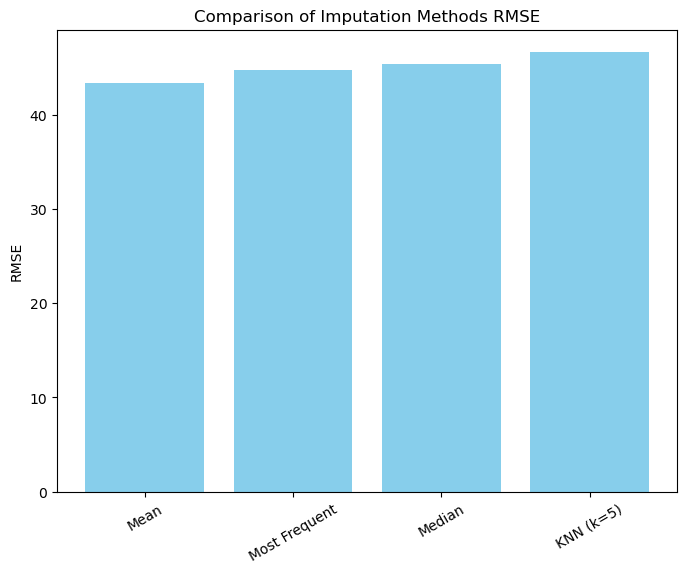

In [227]:
#2.11
rmse_results = {'Mean' : rmse_mean, 'Median' : rmse_median, 'Most Frequent' : rmse_most_freq, 'KNN (k=5)' : rmse_knn}

rmse_df = pd.DataFrame.from_dict(rmse_results, orient = 'index', columns=['RMSE']).sort_values('RMSE')

print(rmse_df)

plt.figure(figsize = (8,6))
plt.bar(rmse_df.index, rmse_df['RMSE'], color='skyblue')
plt.ylabel('RMSE')
plt.title('Comparison of Imputation Methods RMSE')
plt.xticks(rotation = 30)
plt.show()

Mean imputation performed best (lowest RMSE = 43.38), followed by Most Frequent (44.79), Median (45.40), and KNN(k=5) (46.69).
Why: The mean minimizes mean-squared error for roughly symmetric distributions, while KNN can underperform without proper scaling/tuning or strong feature correlations; Median is not MSE-optimal, and Most Frequent is generally unsuitable for continuous variables.

    k       RMSE
0   3  49.325217
1   5  46.693719
2   7  45.962554
3  10  45.259617


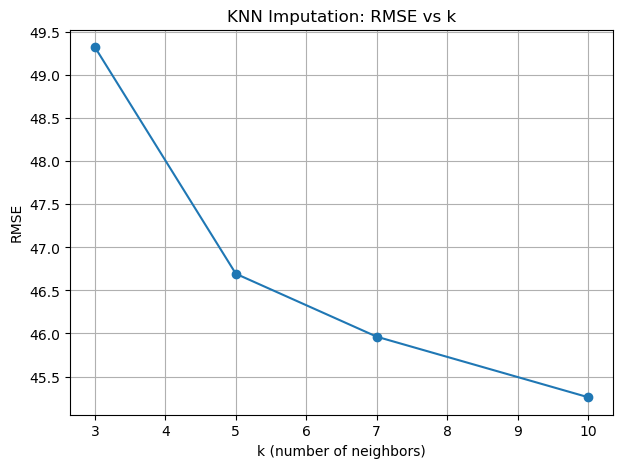

In [213]:
#2.12
ks = [3, 5, 7, 10]
k_rmse = []

for k in ks:
    imputer_k = KNNImputer(n_neighbors=k)
    imputer_k.fit(train_df[num_cols])  # train 데이터로 학습
    
    # test set 변환
    pred_k = imputer_k.transform(test_df_missing[num_cols])
    pred_k_df = pd.DataFrame(pred_k, columns=num_cols, index=test_df_missing.index)
    
    # RMSE 계산
    rmse_k = np.sqrt(mean_squared_error(
        test_eval_copy['avg_glucose_level'],
        pred_k_df['avg_glucose_level']
    ))
    k_rmse.append(rmse_k)

# 결과 DataFrame
bonus_df = pd.DataFrame({"k": ks, "RMSE": k_rmse})
print(bonus_df)

# RMSE vs k 그래프
plt.figure(figsize=(7,5))
plt.plot(bonus_df["k"], bonus_df["RMSE"], marker='o')
plt.xlabel("k (number of neighbors)")
plt.ylabel("RMSE")
plt.title("KNN Imputation: RMSE vs k")
plt.grid(True)
plt.show()
